# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Lab 1 - Regression

#### Original author: Tony Vu Nguyen (301286979) - tvn4@sfu.ca


In [1]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python


### 1 - Load Data

In [12]:
# Importing the dataset from all csv files
from glob import glob # for pathnames
files = glob("Gas Turbine Dataset\*.csv")
df_list = [pd.read_csv(f, header=0) for f in files]

### 2 - Concatenate Data

In [3]:
# Concatenate data  
df = pd.concat(df_list, axis=0, ignore_index=1)

# # Confirm concatenation
# df.to_csv(index=0)
# df.to_excel("dataset.xlsx")

### 3 - Histogram

Text(0, 0.5, 'Frequency')

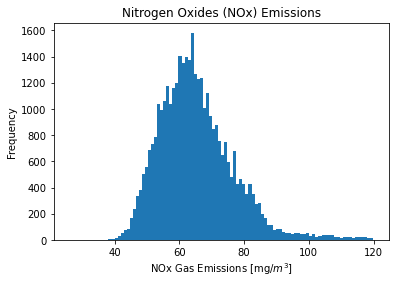

In [4]:
# Histogram creation using Mathplotlib
hist = plt.hist(df['NOX'], bins=100)
plt.title('Nitrogen Oxides (NOx) Emissions')
plt.xlabel('NOx Gas Emissions [mg/$m^3$]')
plt.ylabel('Frequency')

In [5]:
# # Histogram creation using pandas
# hist = df.hist(column='NOX', bins=100)
# plt.title('Nitrogen Oxides (NOx) Emissions')
# plt.xlabel('Gas Emissions [mg/$m^3$]')
# plt.ylabel('Frequency')

### 4 - Scatter Plots

In [6]:
# Variable initialization
x = df['TIT']
y1 = df['TAT']
y2 = df['TEY']

Text(0, 0.5, 'Turbine after temperature (TAT) [$^o$C]')

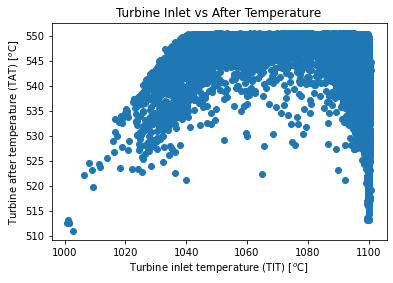

In [7]:
# a. Turbine inlet temperature (TIT) versus Turbine after temperature (TAT)
plt.scatter(x,y1)
plt.title('Turbine Inlet vs After Temperature')
plt.xlabel('Turbine inlet temperature (TIT) [$^o$C]')
plt.ylabel('Turbine after temperature (TAT) [$^o$C]')

Text(0, 0.5, 'Turbine energy yield (TEY) [MWH]')

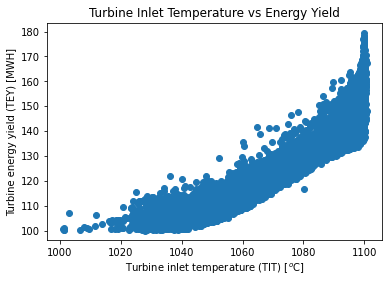

In [8]:
# b. Turbine inlet temperature (TIT) versus Turbine energy yield (TEY)
plt.title('Turbine Inlet Temperature vs Energy Yield')
plt.scatter(x,y2)
plt.xlabel('Turbine inlet temperature (TIT) [$^o$C]')
plt.ylabel('Turbine energy yield (TEY) [MWH]')

In [9]:
# c. Pearson correlation coefficient (r-value) calculation

import scipy as sp
# for statistical calculations

r_a = sp.stats.pearsonr(x,y1)
r_b = sp.stats.pearsonr(x,y2)
# output of pearsonr is (r-value , p-value)

print(r_a, r_b)

(-0.3808623936201161, 0.0) (0.9102972462822883, 0.0)


### 5 - Splitting the Data

In [10]:
# Swap CDP and TEY Columns
cols = list(df.columns)
a, b = cols.index('CDP'), cols.index('TEY')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]

# Split features and targets - F: Features, T: Targets
F = df.iloc[:, 0:8]
T = df.iloc[:, 8:11]

# Splitting dataset into the Training and Test sets
from sklearn.model_selection import train_test_split 
F_train, F_test, T_train, T_test = train_test_split(F, T, test_size=0.2, random_state=0)

# # Save Test Set
# x_test.to_csv('features_turbine_test.csv', index=0)
# y_test.to_csv('targets_tubine_test.csv', index=0)

#Store important data features for use in other notebooks
%store df F T F_train F_test T_train T_test

Stored 'df' (DataFrame)
Stored 'F' (DataFrame)
Stored 'T' (DataFrame)
Stored 'F_train' (DataFrame)
Stored 'F_test' (DataFrame)
Stored 'T_train' (DataFrame)
Stored 'T_test' (DataFrame)
